# Speed Dating Data Analysis

## Import libraries and dataset

In [209]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('Solarize_Light2')

In [210]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding='unicode_escape')

## Description of the Dataset


We can se that the data tinder gathered is rather big : 8378 rows and 195 columns

In addition, we notice that categorical data such as gender is coded as numbers (int64) as indicated in the Data Key document

In [211]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

Several variables are notes from 1 to 10 for several attributes. This kind of data is qualitative and ordinal (attr).

However, for other attributes the chosen scale was a point allocation for a total sum of 100 points (attr1_1) which is closer to a discrete continous variable.

This differnece of scale has to be kept in mind for adequate comparisons. 

We can for example bring the 1-10 scale to a 100 scale  with a simple calculation, which is what was done for most attribute notes.

In [212]:
df[['attr','attr1_1']].describe()

,attr,attr1_1
count,8176.000000,8299.000000
mean,6.189995,22.514632
std,1.950169,12.587674
min,0.000000,0.000000
25%,5.000000,15.000000
50%,6.000000,20.000000
75%,8.000000,25.000000
max,10.000000,100.000000


We can visualize the age distribution of participants.

Most participants were around 26 years of age with some extreme values of 18 years old and 55 years old.

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Density'>

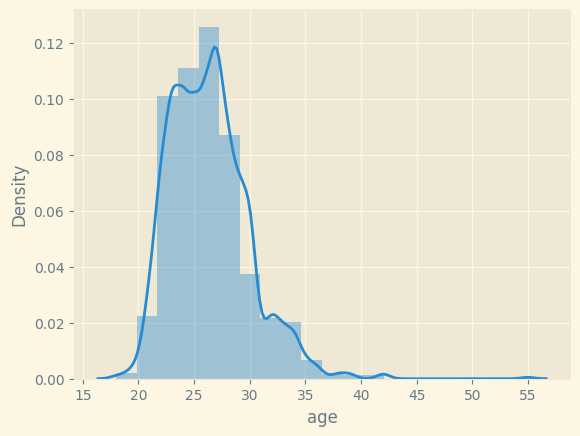

In [213]:
%%capture --no-display --no-stdout

print(df['age'].describe())
sns.distplot(df['age'],bins=20)

# Heatmap

In [214]:
# heatmap stuff
# Scatter plot ? for every pair of columns

An interesting aspect of the data set is why peaople participated.

Most participants wanted either to have fun or to meet new people.

- Seemed like a fun night out = Fun
- To meet new people = New people
- To get a date = Date
- Looking for a serious relationship = LT relation
- To say I did it = Challenge
- Other = Other

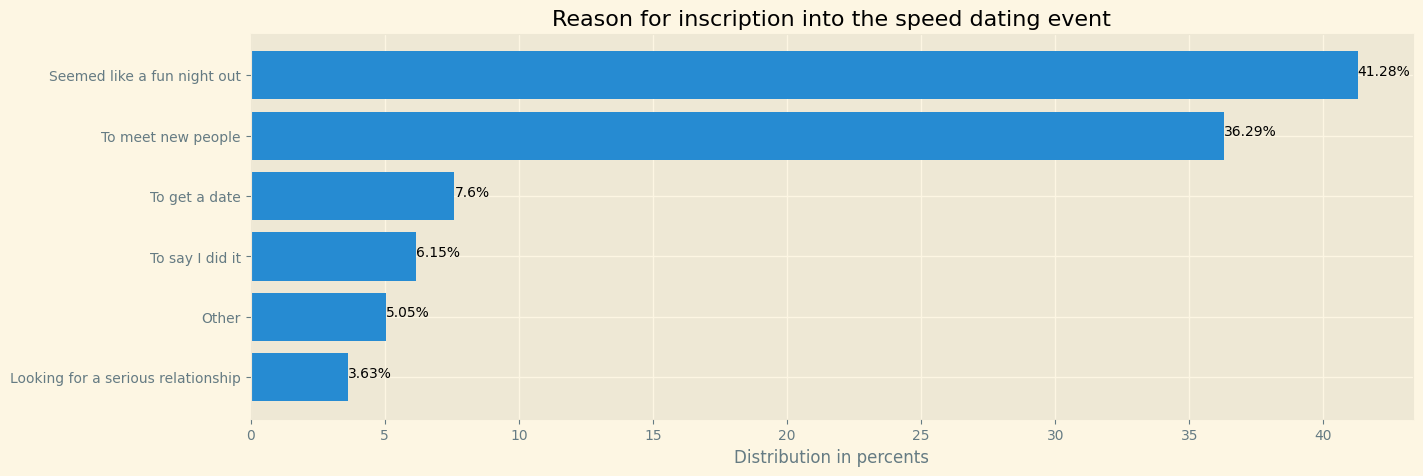

In [215]:
goals = df["goal"].apply(lambda x : 
                         'Seemed like a fun night out' if x ==1
                         else 'To meet new people' if x == 2
                         else 'To get a date' if x == 3
                         else 'Looking for a serious relationship' if x  == 4
                         else 'To say I did it' if x == 5
                         else 'Other' if x == 6
                         else 'NaN')

goal_values = goals.value_counts(ascending=True)
goal_values

sum = np.sum(goal_values[1:])
dist = [np.round((x/sum)*100,2) for x in goal_values[1:]]

plt.figure(figsize=(15,5))
plt.title("Reason for inscription into the speed dating event")
plt.barh(goal_values.index[1:], dist)
plt.xlabel('Distribution in percents')

for i in range(len(dist)):
    plt.text(dist[i], goal_values.index[1:][i],f'{dist[i]}%')

plt.show()

## What makes people interested in each other
This is the main question we are going to try to answer. 

In the following I will be looking at differents aspects of peoples interests, choices and self image in the dating world.

## Are shared interests more important than a shared racial background?

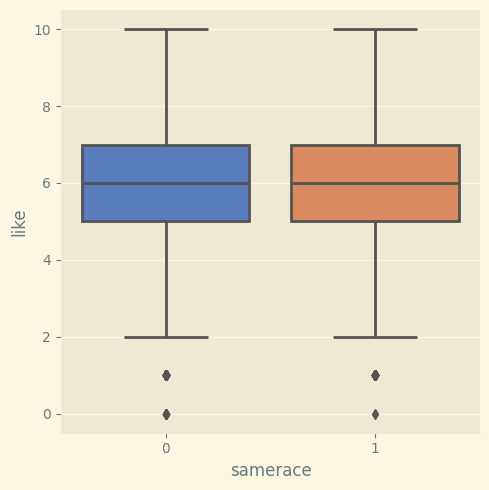

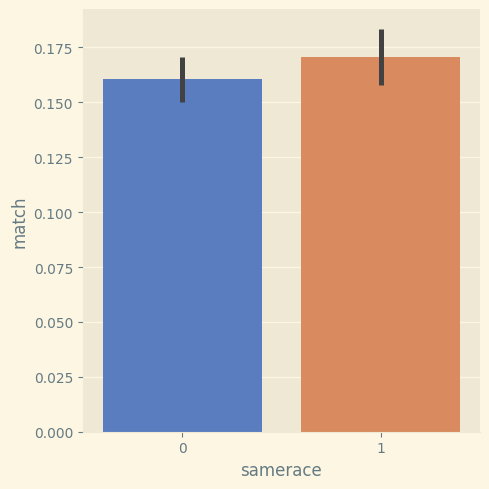

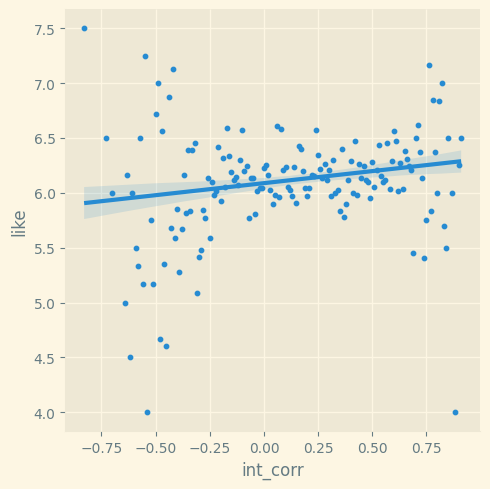

In [216]:
sns.catplot(x="samerace", y='like', palette='muted', kind='box', data = df)
sns.catplot(x="samerace", y='match', palette='muted', kind='bar', data = df)
sns.lmplot(x='int_corr', y="like", palette='muted', x_estimator=np.mean, x_ci=None, data = df, scatter_kws={"s": 10})

In [217]:
self_interests = df.iloc[:,np.r_[0,11,50:67]]
partner_interests = df.iloc[:,np.r_[0,50:67]].groupby('iid').mean()
self_interests




,iid,pid,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,11.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,1,12.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,1,13.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,1,14.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,1,15.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8374,552,527.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8375,552,528.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8376,552,529.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0


## What are the most/least desirable attributes
I selected only answers at signup (Time1) and the followups (Time 2 and Time 3 : the day after the experiment and 3-4 weeks later) because some variables are missing in the halfwaythrough questionnaire.

First I define masks to separate men and women from the initial dataset.

Then I select the variables I am interested in (attribute scores ending with 1\_1, 1\_2, etc..). 

Regarding men's attributes, the variables correspond to the attribute scores of :

- What women look for in men

- What women think other women look for in men

- What men think women look for in men

Regarding women's attributes, the variables correspond to the attribute scores of :

- What men look for in women

- What men think other men look for in women

- What women think men look for in women

## Men attributes

In [218]:
# Masks
woman_only = df['gender'] == 0
men_only = df['gender'] == 1


list_of_variables = ['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '4_1', '4_2', '4_3']

list_of_lists = []
for i in list_of_variables:
    one_list = [col for col in df.columns if i in col]
    list_of_lists.append(one_list)


w_expect1 = df[woman_only][list_of_lists[0]]                 # What women like about men
w_expect_2 = df[woman_only][list_of_lists[1]]
w_expect_3 = df[woman_only][list_of_lists[2]]

m_thoughts_1 = df[men_only][list_of_lists[3]]               # What men think women like about men
m_thoughts_2 = df[men_only][list_of_lists[4]]
m_thoughts_3 = df[men_only][list_of_lists[5]]

other_w_expect_1 = df[woman_only][list_of_lists[6]]           # What women think other women like about men
other_w_expect_2 = df[woman_only][list_of_lists[7]]
other_w_expect_3 = df[woman_only][list_of_lists[8]]

df_dict_m = {'w_expect_1' : w_expect1, 
          'w_expect_2' : w_expect_2, 
          'w_expect_3' : w_expect_3, 
          'm_thoughts_1' : m_thoughts_1, 
          'm_thoughts_2' : m_thoughts_2, 
          'm_thoughts_3' : m_thoughts_3, 
          'other_w_expect_1' : other_w_expect_1, 
          'other_w_expect_2' : other_w_expect_2, 
          'other_w_expect_3' : other_w_expect_3}


for value in df_dict_m.values():
    value.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_dict_m = {}
for key, value in df_dict_m.items():
    mean_dict_m[key] = value.mean()

mean_df_m = pd.DataFrame(mean_dict_m).rename_axis('attributes').reset_index()

mean_melted_m = pd.melt(mean_df_m, id_vars='attributes', var_name="source", value_name="score")


## Women attributes


In [219]:
m_expect_1 = df[men_only][list_of_lists[0]]                 # What men like about women
m_expect_2 = df[men_only][list_of_lists[1]]
m_expect_3 = df[men_only][list_of_lists[2]]

w_thoughts_1 = df[woman_only][list_of_lists[3]]               # What women think men like about women
w_thoughts_2 = df[woman_only][list_of_lists[4]]
w_thoughts_3 = df[woman_only][list_of_lists[5]]

other_m_expect_1 = df[men_only][list_of_lists[6]]           # What men think other men like about women
other_m_expect_2 = df[men_only][list_of_lists[7]]
other_m_expect_3 = df[men_only][list_of_lists[8]]

df_dict_w = {'m_expect_1' : m_expect_1,
             'm_expect_2' : m_expect_2,
             'm_expect_3' : m_expect_3,
             'w_thoughts_1' : w_thoughts_1,
             'w_thoughts_2' : w_thoughts_2,
             'w_thoughts_3'  : w_thoughts_3 ,
             'other_m_expect_1' : other_m_expect_1,
             'other_m_expect_2' : other_m_expect_2,
             'other_m_expect_3' : other_m_expect_3}


for value in df_dict_w.values():
    value.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_dict_w = {}
for key, value in df_dict_w.items():
    mean_dict_w[key] = value.mean()

mean_df_w = pd.DataFrame(mean_dict_w).rename_axis('attributes').reset_index()

mean_melted_w = pd.melt(mean_df_w, id_vars='attributes', var_name="source", value_name="score")


(0.0, 32.0)

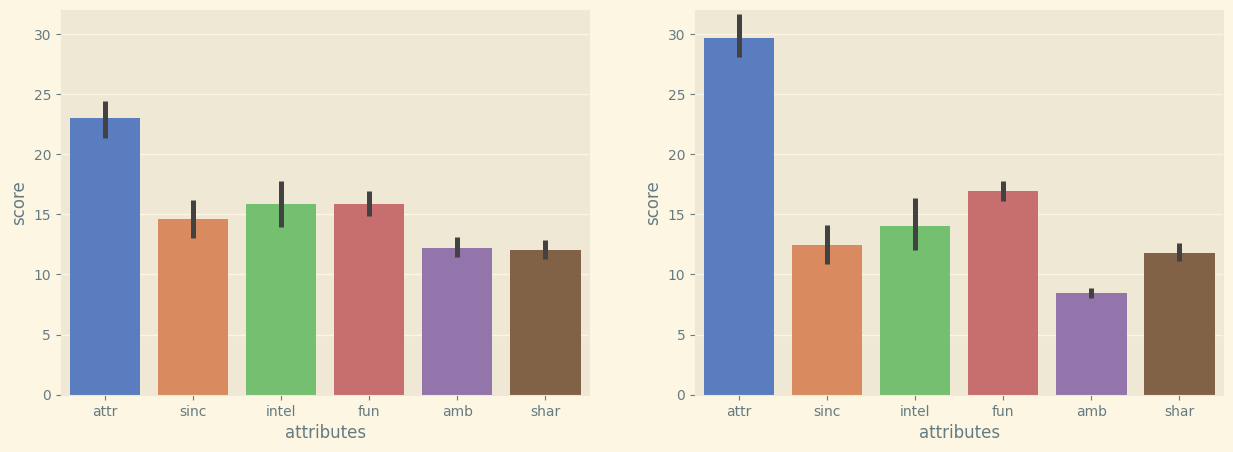

In [220]:
fig , axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(ax= axes[0],x='attributes', y="score", palette='muted', data = mean_melted_m).set_ylim([0,32])
sns.barplot(ax= axes[1],x='attributes', y="score", palette='muted', data = mean_melted_w).set_ylim([0,32])

## Can people accurately predict their own perceived value in the dating market?

In [221]:
df.describe(include='all').iloc[:,np.r_[87:92,98:103]]

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb
count,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524
std,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055
min,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000
50%,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000


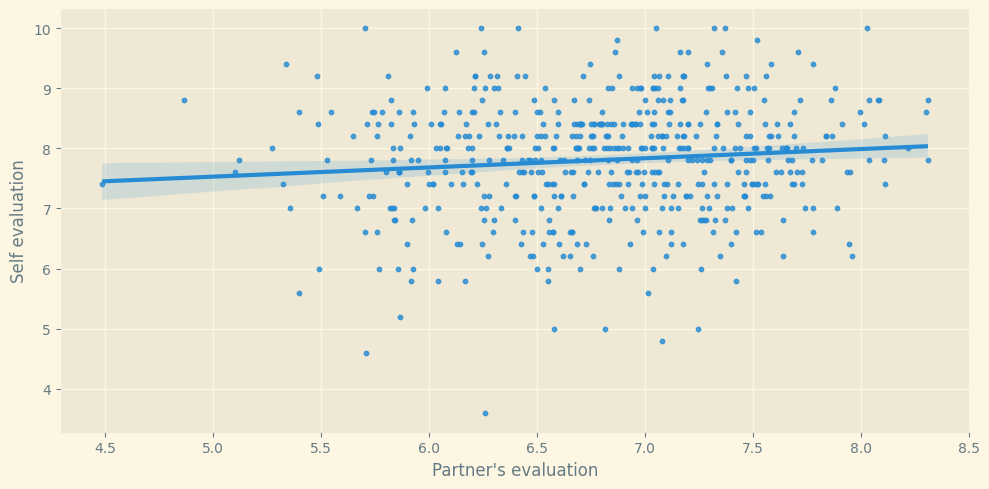

In [222]:
self_eval = df.iloc[:,np.r_[0,87:92]]
partner_eval = df.iloc[:,np.r_[0,24:29]] 

self_eval = self_eval.groupby('iid').mean().reset_index()
partner_eval = partner_eval.groupby('iid').mean().reset_index()


partner_eval = partner_eval.set_index('iid').rename_axis("")
self_eval = self_eval.set_index('iid').rename_axis("")

evals = pd.DataFrame()
evals['partner_eval'] = partner_eval.mean(axis=1)
evals['self_eval'] = self_eval.mean(axis=1)

plot_a = sns.lmplot(x='partner_eval',y='self_eval', palette='muted',data = evals, scatter_kws={"s": 10}, aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")


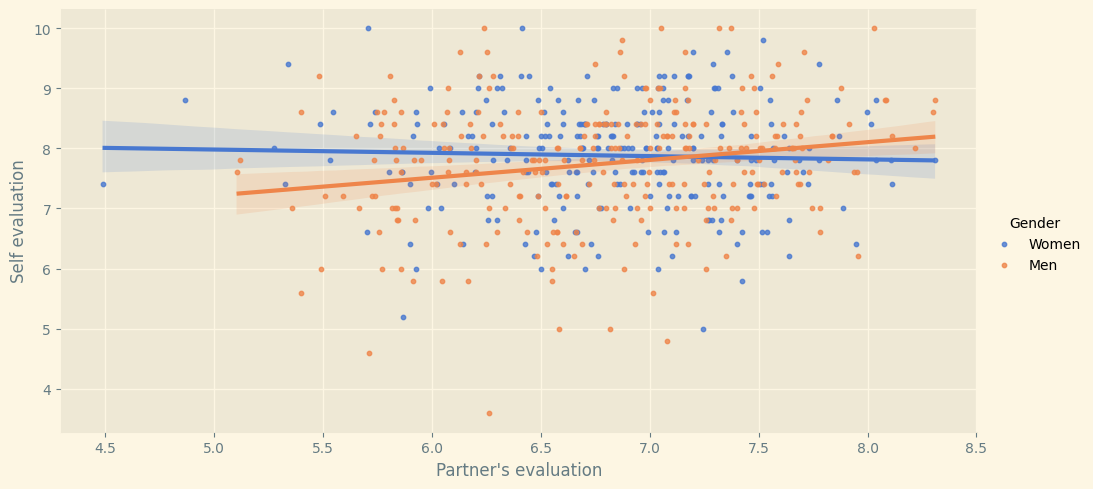

In [223]:
gender = df.iloc[:,np.r_[0,2]]
gender = gender.groupby('iid').mean().reset_index()

evals['Gender'] = gender['gender'].apply(lambda x : 'Men' if x == 1 else 'Women')

plot_a = sns.lmplot(x='partner_eval',y='self_eval', hue='Gender',palette='muted',data = evals, scatter_kws={"s": 10},aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")
